In [60]:
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import pandas as pd
from astropy.table import Table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read Data

In [2]:
ls /blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2

adaptive_param_plot.py  __init__.py     README~   sp--s-i/  spu-smi/  s-u-smi/
allgeos_props.fits      JWST.ipynb      s-pbhmi/  s-p-smi/  s---s-i/
ccds.ipynb              MIRI_ccd.pdf    s-pbsmi/  sp--smi/  s---smi/
ccds.py                 NIRCam_ccd.pdf  sp--h-i/  spubhmi/  s-ubhmi/
ccds.py~                __pycache__/    s-p-hmi/  spubsmi/  s-ubsmi/
dust_opacity.fits       README          sp--hmi/  spu-hmi/  s-u-hmi/


In [79]:
data_1mm_sp__s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--s-i/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spu_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_u_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_pbhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbhmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_p_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s___s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---s-i/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_pbsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbsmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_sp__smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s___smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_sp__h_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--h-i/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubhmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_ubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubhmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_p_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-hmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubsmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_ubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubsmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_sp__hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--hmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spu_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-hmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_u_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-hmi/convolved/user_filters/ALMA-IMF_1mm.fits')

In [111]:
data_1mm = [
    data_1mm_sp__s_i,
    data_1mm_spu_smi,
    data_1mm_s_u_smi,
    data_1mm_s_pbhmi,
    data_1mm_s_p_smi,
    data_1mm_s___s_i,
    data_1mm_s_pbsmi,
    data_1mm_sp__smi,
    data_1mm_s___smi,
    data_1mm_sp__h_i,
    data_1mm_spubhmi,
    data_1mm_s_ubhmi,
    data_1mm_s_p_hmi,
    data_1mm_spubsmi,
    data_1mm_s_ubsmi,
    data_1mm_sp__hmi,
    data_1mm_spu_hmi,
    data_1mm_s_u_hmi
    ]

In [80]:
data_3mm_sp__s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--s-i/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spu_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_u_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_pbhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbhmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_p_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s___s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---s-i/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_pbsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbsmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_sp__smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s___smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_sp__h_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--h-i/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubhmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_ubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubhmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_p_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-hmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubsmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_ubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubsmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_sp__hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--hmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spu_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-hmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_u_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-hmi/convolved/user_filters/ALMA-IMF_3mm.fits')

In [112]:
data_3mm = [
    data_3mm_sp__s_i,
    data_3mm_spu_smi,
    data_3mm_s_u_smi,
    data_3mm_s_pbhmi,
    data_3mm_s_p_smi,
    data_3mm_s___s_i,
    data_3mm_s_pbsmi,
    data_3mm_sp__smi,
    data_3mm_s___smi,
    data_3mm_sp__h_i,
    data_3mm_spubhmi,
    data_3mm_s_ubhmi,
    data_3mm_s_p_hmi,
    data_3mm_spubsmi,
    data_3mm_s_ubsmi,
    data_3mm_sp__hmi,
    data_3mm_spu_hmi,
    data_3mm_s_u_hmi
]

In [81]:
data_aug_sp__s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--s-i/augmented_parameters.fits')
data_aug_spu_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-smi/augmented_parameters.fits')
data_aug_s_u_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-smi/augmented_parameters.fits')
data_aug_s_pbhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbhmi/augmented_parameters.fits')
data_aug_s_p_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-smi/augmented_parameters.fits')
data_aug_s___s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---s-i/augmented_parameters.fits')
data_aug_s_pbsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbsmi/augmented_parameters.fits')
data_aug_sp__smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--smi/augmented_parameters.fits')
data_aug_s___smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---smi/augmented_parameters.fits')
data_aug_sp__h_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--h-i/augmented_parameters.fits')
data_aug_spubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubhmi/augmented_parameters.fits')
data_aug_s_ubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubhmi/augmented_parameters.fits')
data_aug_s_p_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-hmi/augmented_parameters.fits')
data_aug_spubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubsmi/augmented_parameters.fits')
data_aug_s_ubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubsmi/augmented_parameters.fits')
data_aug_sp__hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--hmi/augmented_parameters.fits')
data_aug_spu_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-hmi/augmented_parameters.fits')
data_aug_s_u_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-hmi/augmented_parameters.fits')

In [113]:
data_aug = [
    data_aug_sp__s_i,
    data_aug_spu_smi,
    data_aug_s_u_smi,
    data_aug_s_pbhmi,
    data_aug_s_p_smi,
    data_aug_s___s_i,
    data_aug_s_pbsmi,
    data_aug_sp__smi,
    data_aug_s___smi,
    data_aug_sp__h_i,
    data_aug_spubhmi,
    data_aug_s_ubhmi,
    data_aug_s_p_hmi,
    data_aug_spubsmi,
    data_aug_s_ubsmi,
    data_aug_sp__hmi,
    data_aug_spu_hmi,
    data_aug_s_u_hmi
]

In [115]:
geos = [
    'sp--s-i',
    'spu-smi',
    's-u-smi',
    's-pbhmi',
    's-p-smi',
    's---s-i',
    's-pbsmi',
    'sp--smi',
    's---smi',
    'sp--h-i',
    'spubhmi',
    's-ubhmi',
    's-p-hmi',
    'spubsmi',
    's-ubsmi',
    'sp--hmi',
    'spu-hmi',
    's-u-hmi'
]

No Mass: sp--s-i
No Mass: s---s-i
No Mass: sp--smi
No Mass: s---smi
No Mass: sp--h-i
No Mass: sp--hmi


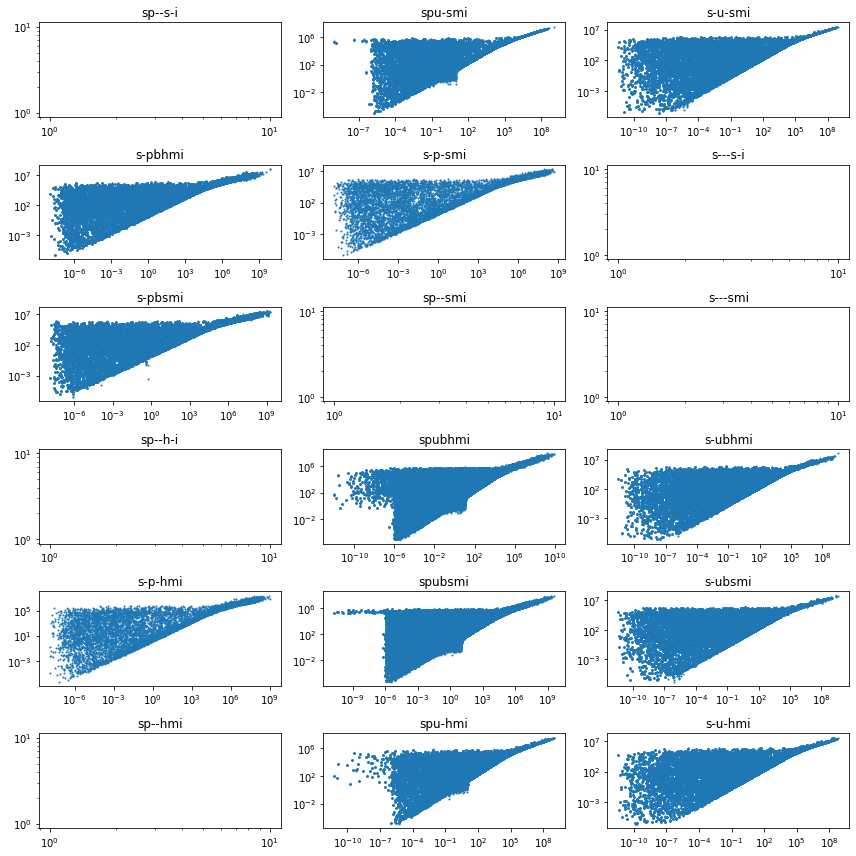

In [118]:
fig, axes = plt.subplots(6,3, figsize=(12,12))

axs = axes.flatten()

#axs[0].scatter(data_aug_spubhmi['Line-of-Sight Masses'][:, -1], data_1mm_spubhmi['TOTAL_FLUX'][:, -1], 1)

for ii in range(len(axs)):
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geos[ii])
    try: 
        axs[ii].scatter(data_aug[ii]['Line-of-Sight Masses'][:, -1], data_1mm[ii]['TOTAL_FLUX'][:, -1], 1)
    except:
        print('No Mass:', geos[ii])
fig.tight_layout()

No Mass: s---s-i
No Mass: s---smi


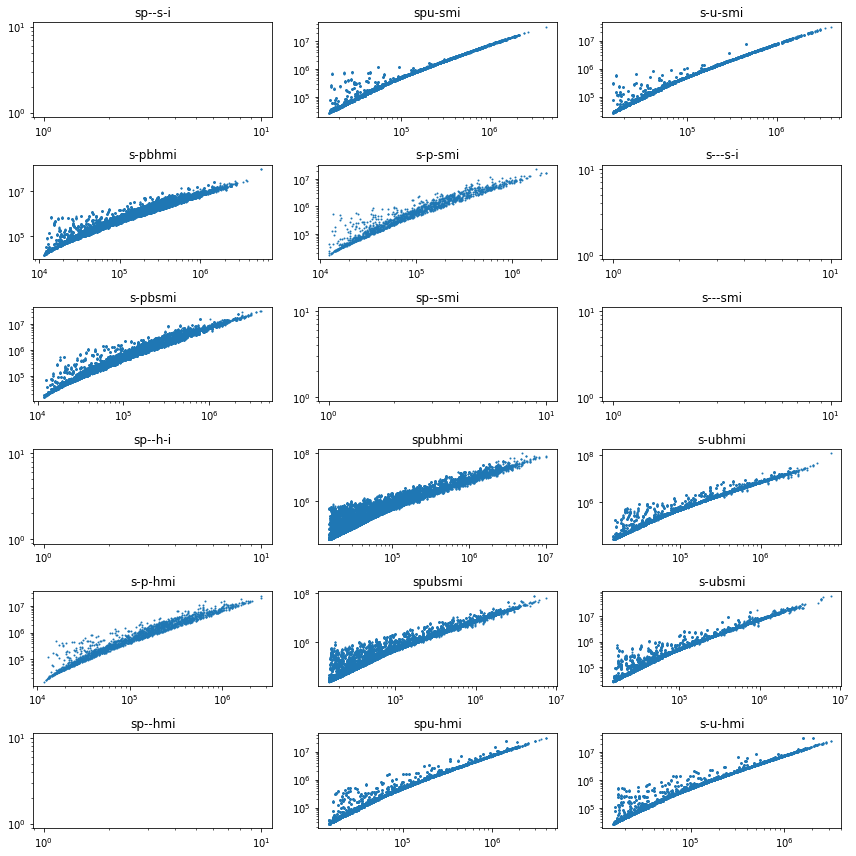

In [119]:
fig, axes = plt.subplots(6,3, figsize=(12,12))

axs = axes.flatten()

#axs[0].scatter(data_aug_spubhmi['Line-of-Sight Masses'][:, -1], data_1mm_spubhmi['TOTAL_FLUX'][:, -1], 1)

for ii in range(len(axs)):
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geos[ii])
    try: 
        axs[ii].scatter(data_aug[ii]['Sphere Masses'][:, -1], data_1mm[ii]['TOTAL_FLUX'][:, -1], 1)
    except:
        print('No Mass:', geos[ii])
fig.tight_layout()

Text(0, 0.5, 'Flux')

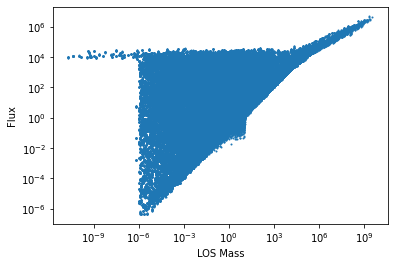

In [75]:
plt.scatter(mass, flux, 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('LOS Mass')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

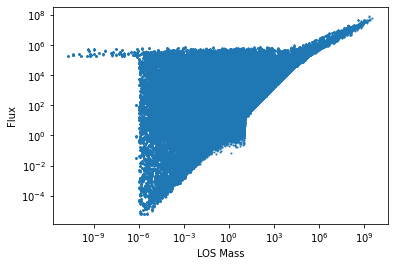

In [77]:
plt.scatter(data_aug['Line-of-Sight Masses'][:, -1], data_1mm['TOTAL_FLUX'][:, -1], 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('LOS Mass')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

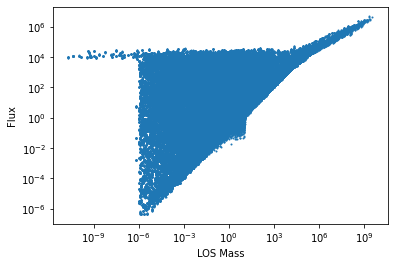

In [50]:
plt.scatter(data_aug['Line-of-Sight Masses'][:, -1], data_3mm['TOTAL_FLUX'][:, -1], 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('LOS Mass')
plt.ylabel('Flux')

Text(0, 0.5, 'Color')

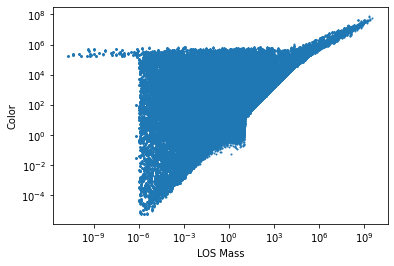

In [51]:
plt.scatter(data_aug['Line-of-Sight Masses'][:, -1], data_1mm['TOTAL_FLUX'][:, -1] - data_3mm['TOTAL_FLUX'][:, -1], 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('LOS Mass')
plt.ylabel('Color')

Text(0, 0.5, 'Flux')

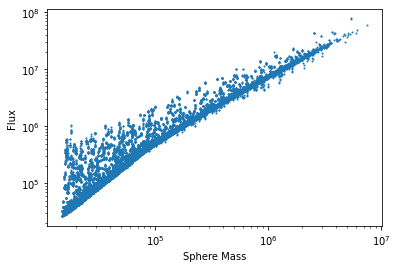

In [52]:
plt.scatter(data_aug['Sphere Masses'][:, -1], data_1mm['TOTAL_FLUX'][:, -1], 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sphere Mass')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

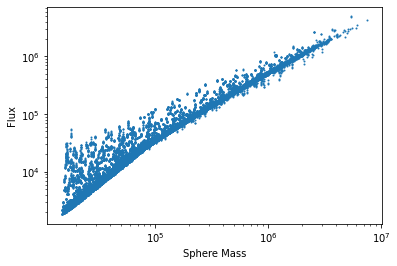

In [53]:
plt.scatter(data_aug['Sphere Masses'][:, -1], data_3mm['TOTAL_FLUX'][:, -1], 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sphere Mass')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

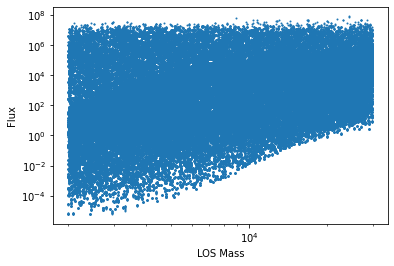

In [54]:
plt.scatter(data_aug['star.temperature'][:], data_1mm['TOTAL_FLUX'][:, -1], 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('LOS Mass')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

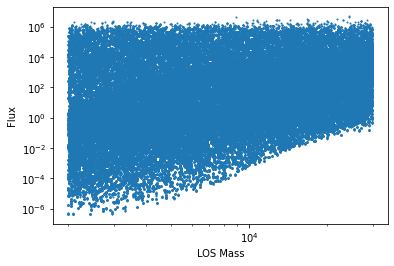

In [55]:
plt.scatter(data_aug['star.temperature'][:], data_3mm['TOTAL_FLUX'][:, -1], 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('LOS Mass')
plt.ylabel('Flux')

In [56]:
data_aug

MODEL_NAME,star.radius,star.temperature,disk.mass,disk.rmax,disk.beta,disk.p,disk.h100,envelope.rho_0,envelope.rc,cavity.power,cavity.theta_0,cavity.rho_0,ambient.density,ambient.temperature,scattering,inclination,Model Luminosity,Line-of-Sight Masses,Sphere Masses,Outer Radius,Line-of-Sight Weighted Temperatures,Sphere Weighted Temperatures,Disk Minimum Q
,,,,,,,,,,,,,,,,,solLum,,,,,,
bytes20,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64[20],float64[20],float64,float64[20],float64[20],float64
003NEvmw_01,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,1.6659023447195953,5.830100737379585,3.3430566353829443 .. 2750.8216889355535,3.3720396198182043 .. --,605996.0389155973,100.5280662025255 .. --,100.54304871575859 .. --,0.03007397857692694
003NEvmw_02,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,11.978576008237317,5.830100737379585,3.344021440770447 .. 2750.8216889354862,3.3720396198182043 .. --,605996.0389155973,100.50826128338862 .. --,100.54304871575859 .. --,0.03007397857692694
003NEvmw_03,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,22.594123096188746,5.830100737379585,3.370949393857458 .. 2750.821688935478,3.3720396198182043 .. --,605996.0389155973,99.90316961348775 .. --,100.54304871575859 .. --,0.03007397857692694
003NEvmw_04,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,38.368193932883614,5.830100737379585,3.422554948849835 .. 2750.8216889354458,3.3720396198182043 .. --,605996.0389155973,98.7689346670353 .. --,100.54304871575859 .. --,0.03007397857692694
003NEvmw_05,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,48.959862679294,5.830100737379585,3.4739684083219635 .. 2750.8216889354726,3.3720396198182043 .. --,605996.0389155973,97.66068075708188 .. --,100.54304871575859 .. --,0.03007397857692694
003NEvmw_06,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,51.95900895552854,5.830100737379585,3.4911778499881145 .. 2750.8216889354817,3.3720396198182043 .. --,605996.0389155973,97.29461229841284 .. --,100.54304871575859 .. --,0.03007397857692694
003NEvmw_07,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,67.58391683466441,5.830100737379585,3.6025251335837525 .. 2750.821688935421,3.3720396198182043 .. --,605996.0389155973,94.98326579639196 .. --,100.54304871575859 .. --,0.03007397857692694
003NEvmw_08,0.2219,19040.0,0.05491,1874.0,1.276,-1.931,4.612,7.577e-20,1874.0,1.398,18.47,4.385e-21,1e-23,10.0,1,77.05777618989838,5.830100737379585,3.6927126477313568 .. 2750.8216889354126,3.3720396198182043 .. --,605996.0389155973,93.16904077335124 .. --,100.54304871575859 .. --,0.03007397857692694
